In [97]:
import time
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import Normalize
from PIL import Image


from pc import PS
from modules import ADC,DAC,CHIP
from cimCommand import CMD,CmdData,Packet
from cimCommand.singleCmdInfo import *

from util import plot_v_cond

In [98]:
chip=CHIP(PS(host="192.168.1.10", port = 7, debug=0),init=True)
chip.set_device_cfg(deviceType=0)

Connected to 192.168.1.10:7
local ip: 192.168.1.15 local port: 57311


In [99]:
need_read = np.zeros((256,256),dtype=bool)
need_read[0,:] = 1
voltage_base = chip.read_point2(crossbar=need_read, read_voltage=0,tg=5,gain=1,from_row=True,out_type=0)

需要读256个点


In [100]:
fig_num = 0
def plot_cond(data,vmin = 0,vmax = 1400,title = ""):
    cmap = plt.cm.viridis
    norm = Normalize(vmin=vmin, vmax=vmax)
    im = plt.imshow(data, cmap=cmap,norm=norm)
    cbar = plt.colorbar(im)
    cbar.set_label("us")
    plt.title(title)
    global fig_num
    plt.savefig(f"./temp/{fig_num}.png")  # 保存为 PNG 格式
    fig_num = fig_num +1
    plt.show()

In [5]:
need_read = np.ones((256,256),dtype=bool)
for i in range(18):
    tg = 0.8+0.1*i
    # 先reset
    chip.write_point2(crossbar=need_read,write_voltage=2,tg=5,pulse_width=1e-6,set_device=False)
    # 再set
    chip.write_point2(crossbar=need_read,write_voltage=3,tg=tg,pulse_width=1e-6,set_device=True)
    # 读器件
    voltage_base = chip.read_point2(crossbar=need_read, read_voltage=0,tg=5,gain=1,from_row=True,out_type=0)
    voltage = chip.read_point2(crossbar=need_read, read_voltage=0.1,tg=5,gain=1,from_row=True,out_type=0)
    cond_sub_base = chip.voltage_to_cond(voltage-voltage_base)

    np.save(f"result/器件性能set_1us_reset_1us/{int(tg*10)}v_cond_sub_base.npy", cond_sub_base)

需要写65536个点
需要写65536个点
需要读65536个点
需要读65536个点
需要写65536个点
需要写65536个点
需要读65536个点
需要读65536个点
需要写65536个点
需要写65536个点
需要读65536个点
需要读65536个点
需要写65536个点
需要写65536个点
需要读65536个点
需要读65536个点
需要写65536个点
需要写65536个点
需要读65536个点
需要读65536个点
需要写65536个点
需要写65536个点
需要读65536个点
需要读65536个点
需要写65536个点
需要写65536个点
需要读65536个点
需要读65536个点
需要写65536个点
需要写65536个点
需要读65536个点
需要读65536个点
需要写65536个点
需要写65536个点
需要读65536个点
需要读65536个点
需要写65536个点
需要写65536个点
需要读65536个点
需要读65536个点
需要写65536个点
需要写65536个点
需要读65536个点
需要读65536个点
需要写65536个点
需要写65536个点
需要读65536个点
需要读65536个点
需要写65536个点
需要写65536个点
需要读65536个点
需要读65536个点
需要写65536个点
需要写65536个点
需要读65536个点
需要读65536个点
需要写65536个点
需要写65536个点
需要读65536个点
需要读65536个点
需要写65536个点
需要写65536个点
需要读65536个点
需要读65536个点
需要写65536个点
需要写65536个点
需要读65536个点
需要读65536个点
需要写65536个点
需要写65536个点
需要读65536个点
需要读65536个点


In [ ]:
interval = 20
bin_edges = np.linspace(0, 2000, int(2000/interval)+1)    
data = cond_sub_base.flatten()
counts, bin_edges, _ = plt.hist(data, bins=bin_edges, color='blue', alpha=0.7, edgecolor='black')
max_count = np.max(counts)
max_index = np.argmax(counts)
print(max_index,max_count)
# 添加标题和标签
plt.title(f"{int(tg*10)}v_interval{interval}_{int(max_index)*interval}us_{int(max_index+1)*interval}us")
plt.xlabel("cond(uS)")
plt.ylabel("Frequency")

plt.savefig(f"result/脉宽1us/{int(tg*10)}v_interval{interval}_{int(max_index)*interval}us_{int(max_index+1)*interval}us.png")  # 保存为 PNG 格式
plt.show()

In [111]:
cond_sub_base_path = []
for i in range(18):
    tg = 0.8+0.1*i
    cond_sub_base_path.append(f"result/器件性能set_1us_reset_1us/{int(tg*10)}v_cond_sub_base.npy")


cond_sub_base_path = cond_sub_base_path[5:-4]
print(cond_sub_base_path)

['result/器件性能set_1us_reset_1us/13v_cond_sub_base.npy', 'result/器件性能set_1us_reset_1us/14v_cond_sub_base.npy', 'result/器件性能set_1us_reset_1us/15v_cond_sub_base.npy', 'result/器件性能set_1us_reset_1us/16v_cond_sub_base.npy', 'result/器件性能set_1us_reset_1us/17v_cond_sub_base.npy', 'result/器件性能set_1us_reset_1us/18v_cond_sub_base.npy', 'result/器件性能set_1us_reset_1us/19v_cond_sub_base.npy', 'result/器件性能set_1us_reset_1us/20v_cond_sub_base.npy', 'result/器件性能set_1us_reset_1us/21v_cond_sub_base.npy']


10.0


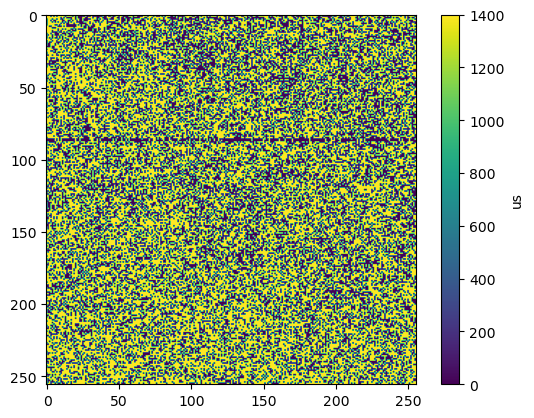

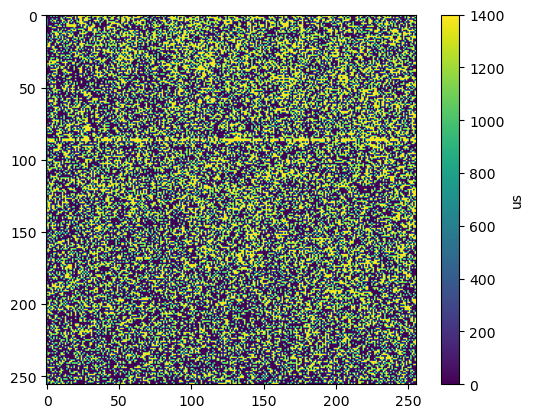

In [112]:
good_device_pos = np.ones((256,256))
threshold = 250
interval = 10
bin_edges = np.linspace(0, 2000, int(2000/interval)+1)  
for path in cond_sub_base_path:
    cond_sub_base = np.load(path)
    data = cond_sub_base.flatten()
    counts, bin_edges = np.histogram(data, bins=bin_edges)
    max_index = np.argmax(counts)
    mid_value = (max_index+0.5)*interval
    good_device_pos += (cond_sub_base>(mid_value-threshold))&(cond_sub_base<(mid_value+threshold))



print(np.max(good_device_pos))
good_device_pos = good_device_pos>8
data = np.zeros((256,256))
data[good_device_pos] = 1400
plot_cond(data)

data = np.zeros((256,256))
data[~good_device_pos] = 1400
plot_cond(data)

In [113]:
print(np.sum(good_device_pos))

37966


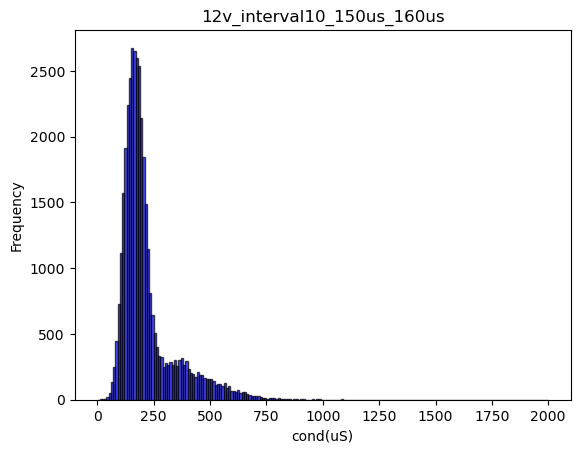

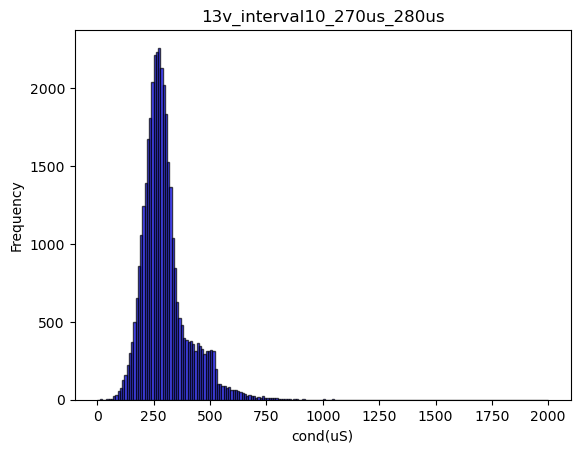

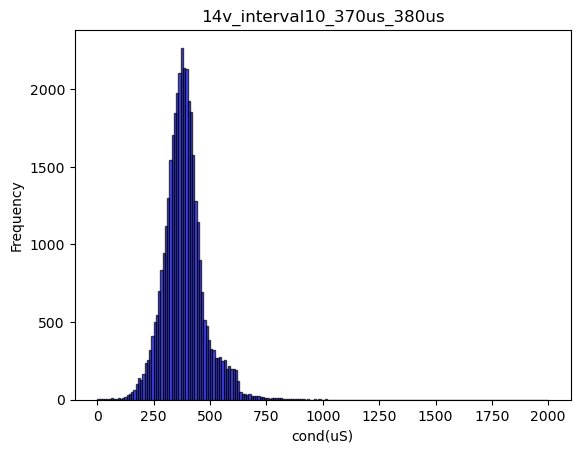

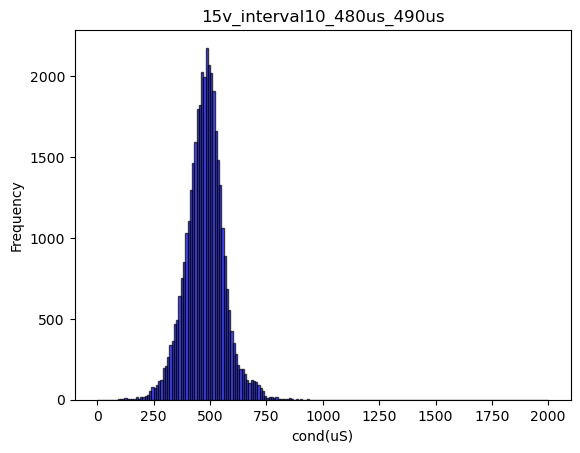

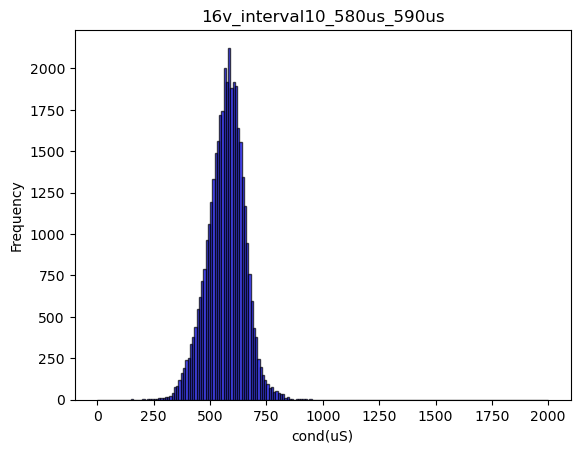

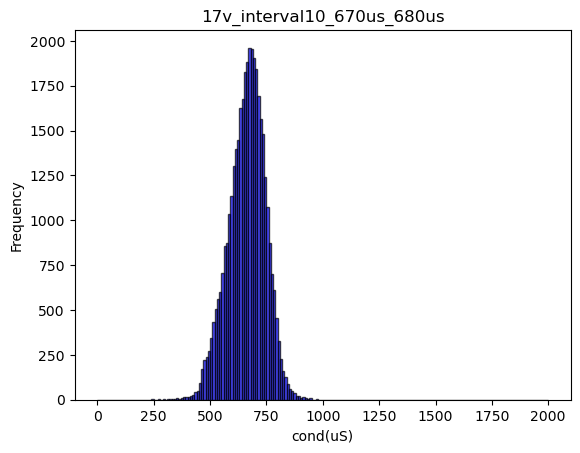

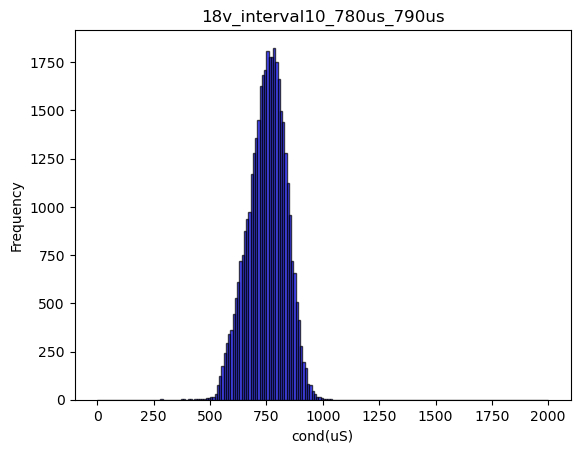

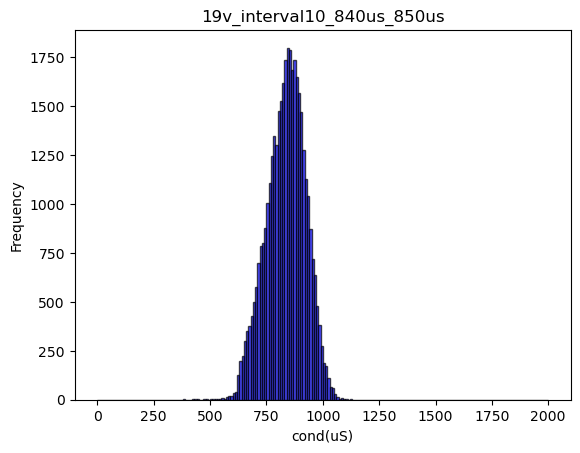

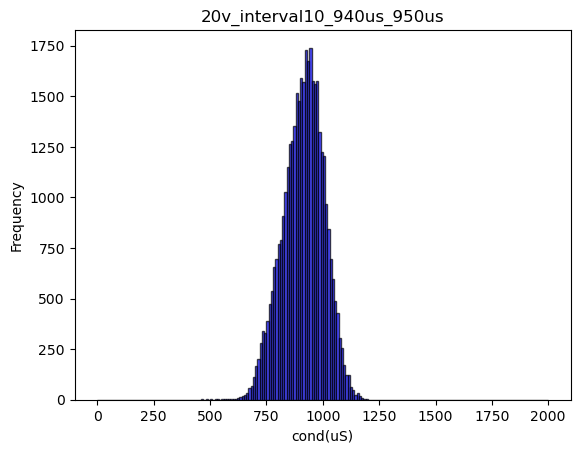

In [114]:
for i,path in enumerate(cond_sub_base_path):
    tg = 1.2+0.1*i
    cond_sub_base = np.load(path)[good_device_pos]
    data = cond_sub_base.flatten()
    counts, bin_edges, _ = plt.hist(data, bins=bin_edges, color='blue', alpha=0.7, edgecolor='black')
    max_count = np.max(counts)
    max_index = np.argmax(counts)
    plt.title(f"{int(tg*10)}v_interval{interval}_{int(max_index)*interval}us_{int(max_index+1)*interval}us")
    plt.xlabel("cond(uS)")
    plt.ylabel("Frequency")

    plt.show()